In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate City List

In [56]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

## Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [102]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key
api_key = weather_api_key

#Build query URL
query_url = url
query_url



'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=82c4499ce25815a712b6c70a69597531'

In [103]:
#Initiate counter for city number below
number = 1

#Lists for holding required items
city_n = []
cloud = []
country = []
date =[]
humid = []
lat = []
lng = []
temp = []
wind = []

#Loop through each city, extract required items, and print result
print('Beginning Data Retrieval')
print('---------------------------')

for city in cities:
    try:
        city_data = (requests.get(query_url + '&q=' + city)).json()
        city_n.append(city_data['name'])
        cloud.append(city_data['clouds']['all'])
        country.append(city_data['sys']['country'])
        date.append(city_data['dt'])
        humid.append(city_data['main']['humidity'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp_max'])
        wind.append(city_data['wind']['speed'])
        print(f'Procesing Record {number} of set {len(cities)}|{city}')
        number = number + 1
    
    except KeyError:
        print(f'City not found. Skipping....')
                
print('---------------------------')
print('Data Retrieval Complete')
print('---------------------------')


Beginning Data Retrieval
---------------------------
Procesing Record 1 of set 607|labuhan
Procesing Record 2 of set 607|buraydah
City not found. Skipping....
Procesing Record 3 of set 607|morant bay
Procesing Record 4 of set 607|dakar
Procesing Record 5 of set 607|ostrovnoy
Procesing Record 6 of set 607|padang
Procesing Record 7 of set 607|ugoofaaru
Procesing Record 8 of set 607|cidreira
Procesing Record 9 of set 607|port alfred
Procesing Record 10 of set 607|saskylakh
Procesing Record 11 of set 607|bethel
City not found. Skipping....
Procesing Record 12 of set 607|port elizabeth
Procesing Record 13 of set 607|russell
Procesing Record 14 of set 607|avarua
Procesing Record 15 of set 607|porbandar
Procesing Record 16 of set 607|nemuro
Procesing Record 17 of set 607|sao filipe
City not found. Skipping....
Procesing Record 18 of set 607|belaya gora
Procesing Record 19 of set 607|east london
Procesing Record 20 of set 607|cape town
Procesing Record 21 of set 607|byron bay
Procesing Record 

Procesing Record 189 of set 607|palauig
Procesing Record 190 of set 607|puerto ayacucho
Procesing Record 191 of set 607|yatou
Procesing Record 192 of set 607|huarmey
Procesing Record 193 of set 607|bambanglipuro
City not found. Skipping....
Procesing Record 194 of set 607|yulara
Procesing Record 195 of set 607|geraldton
Procesing Record 196 of set 607|san policarpo
Procesing Record 197 of set 607|berdigestyakh
Procesing Record 198 of set 607|peleduy
Procesing Record 199 of set 607|coihaique
Procesing Record 200 of set 607|benin
Procesing Record 201 of set 607|portland
Procesing Record 202 of set 607|berlevag
Procesing Record 203 of set 607|atbasar
Procesing Record 204 of set 607|touros
Procesing Record 205 of set 607|san quintin
Procesing Record 206 of set 607|methoni
Procesing Record 207 of set 607|alenquer
Procesing Record 208 of set 607|salinopolis
Procesing Record 209 of set 607|ratnagiri
Procesing Record 210 of set 607|riverton
Procesing Record 211 of set 607|kribi
Procesing Recor

Procesing Record 376 of set 607|yambio
Procesing Record 377 of set 607|jining
Procesing Record 378 of set 607|arman
Procesing Record 379 of set 607|givors
Procesing Record 380 of set 607|takoradi
Procesing Record 381 of set 607|oussouye
Procesing Record 382 of set 607|garissa
City not found. Skipping....
Procesing Record 383 of set 607|san carlos de bariloche
Procesing Record 384 of set 607|sao felix do xingu
City not found. Skipping....
Procesing Record 385 of set 607|beloha
Procesing Record 386 of set 607|finschhafen
City not found. Skipping....
Procesing Record 387 of set 607|causapscal
Procesing Record 388 of set 607|shenjiamen
Procesing Record 389 of set 607|noumea
Procesing Record 390 of set 607|sabang
Procesing Record 391 of set 607|marawi
Procesing Record 392 of set 607|porto novo
Procesing Record 393 of set 607|muscat
Procesing Record 394 of set 607|aklavik
Procesing Record 395 of set 607|los chiles
Procesing Record 396 of set 607|bilibino
Procesing Record 397 of set 607|matag

In [104]:
city_df = pd.DataFrame({'City': city_n,
                            'Cloudiness': cloud,
                            'Country': country,
                            'Date': date,
                            'Humidity': humid,
                            'Lat': lat,
                            'Lng': lng,
                            'Max Temp': temp,
                            'Wind Speed': wind})

#Save dataframe as csv
pd.DataFrame.to_csv(city_df, 'output_data_file')

city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Labuhan,55,ID,1588973120,89,-6.88,112.21,79.14,6.53
1,Buraidah,75,SA,1588973121,29,26.33,43.98,87.80,24.16
2,Morant Bay,20,JM,1588973121,74,17.88,-76.41,86.00,28.86
3,Dakar,3,SN,1588972978,88,14.69,-17.44,71.60,18.34
4,Ostrovnoy,99,RU,1588973122,93,68.05,39.51,33.28,4.74


In [105]:
city_df.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

## Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs

### Latitude vs. Temperature Plot

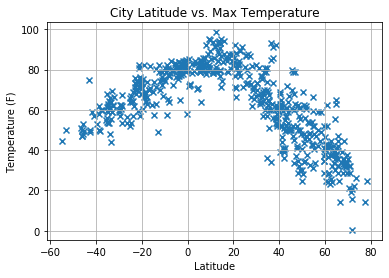

In [106]:
plt.scatter(city_df['Lat'], city_df['Max Temp'], marker = "x")
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('lat_vs_temp.png')
plt.show()

##### Cities which latitudes are between -60 and -40 temperature reached beween 40°f and 60°f, between -40 and -20 temperature reached beween 40°f and 80°f, between -20 and 0 temperature reached beween 50°f and 90°f,between 0 and 20 temperature reached beween 65°f and 100°f,between 20 and 40 temperature reached beween 40°f and 100°f, between 40 and 60 temperature reached beween 25°f and 75°f,between 60 and 80 temperature reached beween -0°f and 60°f

### Latitude vs. Humidity Plot

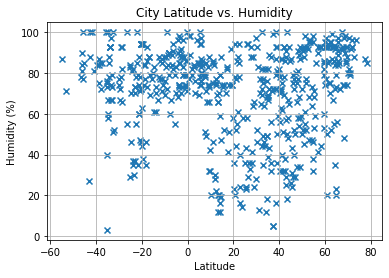

In [107]:
plt.scatter(city_df['Lat'], city_df['Humidity'], marker = "x")
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('lat_vs_Humidity.png')
plt.show()

#### Theres no clear diferentiation between City Laitude and Humidity, but we can tell that most of the cities their humidity is between 60 and 100%

### Latitude vs. Cloudiness Plot

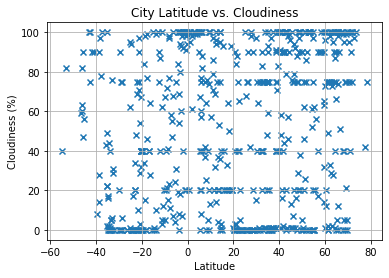

In [108]:
plt.scatter(city_df['Lat'], city_df['Cloudiness'], marker = "x")
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('lat_vs_Cloudiness.png')
plt.show()

#### Theres no clear diferentiation between City Laitude and Cloudiness

### Latitude vs. Wind Speed Plot

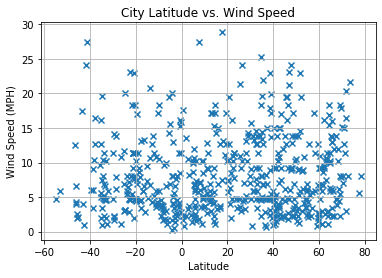

In [109]:
plt.scatter(city_df['Lat'], city_df['Wind Speed'], marker = "x")
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('lat_vs_Wind_Speed.png')
plt.show()

#### Most of the cities had a wind speed range between 0 and 10 MPH

## Linear Regression

In [110]:
#Northern and Southern DF
n_hem = city_df.loc[city_df["Lat"]>0]
s_hem = city_df.loc[city_df["Lat"]<0]

n_hem.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Buraidah,75,SA,1588973121,29,26.33,43.98,87.80,24.16
2,Morant Bay,20,JM,1588973121,74,17.88,-76.41,86.00,28.86
3,Dakar,3,SN,1588972978,88,14.69,-17.44,71.60,18.34
4,Ostrovnoy,99,RU,1588973122,93,68.05,39.51,33.28,4.74
6,Ugoofaaru,77,MV,1588972846,76,5.67,73.00,84.54,6.73


In [111]:
s_hem.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Labuhan,55,ID,1588973120,89,-6.88,112.21,79.14,6.53
5,Padang,100,ID,1588973122,73,-0.95,100.35,79.84,3.53
7,Cidreira,0,BR,1588973122,74,-30.18,-50.21,59.88,4.70
8,Port Alfred,5,ZA,1588972855,97,-33.59,26.89,64.00,4.50
11,Port Elizabeth,0,ZA,1588973126,93,-33.92,25.57,60.80,2.24


### Northern Hemisphire: Max Temperature vs Latitude Linear Regression

The r-squared is: 0.7487715532356061


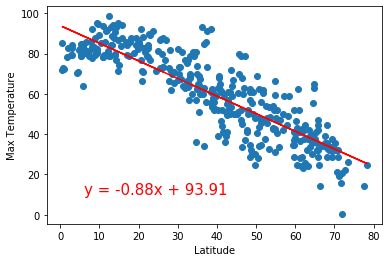

In [125]:
# Northern Hemisphire Lat vs Max Temp
x_values = n_hem['Lat']
y_values = n_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('NH_lat_vs_Max_Tem_Linreg.png')
plt.show()

#### There´s a negative strong correlation between Max Temperature and City Latitude, when the latitude of the city came close to 80, the Max Tempearture starts decending, case contrary if the Latitude came close to 0 the Max Temeparture starts ascending.

### Southern Hemisphire: Max Temperature vs Latitude Linear Regression

The r-squared is: 0.6509891320020383


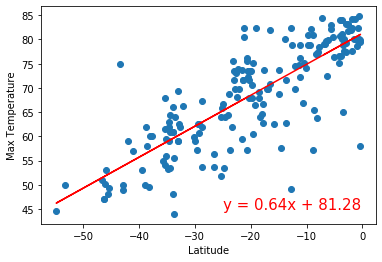

In [126]:
# Southern Hemisphire Lat vs Max Temp
x_values = s_hem['Lat']
y_values = s_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('SH_lat_vs_Max_Tem_Linreg.png')
plt.show()

#### There´s a strong positive correlation between the Max Temperature and the City Latitude, when latitude came close to -50 the max temperature starts descending, case contray when latitude came close to 0, max temperature starts ascending. 

### Northern Hemisphire: Humidity (%) vs Latitude Linear Regression

The r-squared is: 0.034217003504460934


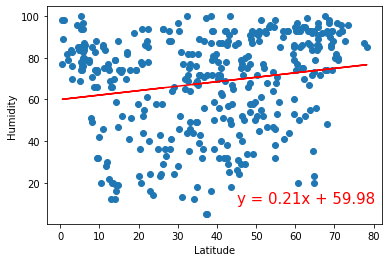

In [124]:
# Northern Hemisphire Lat vs Humidity
x_values = n_hem['Lat']
y_values = n_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('NH_lat_vs_Hum_Linreg.png')
plt.show()

#### There's no correlation between Humidity and Northern Hemisphire City Latitude

### Southern Hemisphire: Humidity (%) vs Latitude Linear Regression

The r-squared is: 0.009420466765393327


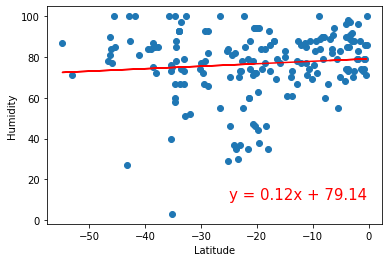

In [129]:
# Southern Hemisphire Lat vs Max Temp
x_values = s_hem['Lat']
y_values = s_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('SH_lat_vs_Hum_Linreg.png')
plt.show()

#### There´s no correlation between Humidity and Southern Hemisphire City Latitude

### Northern Hemisphire: Cloudiness (%) vs Latitude Linear Regression

The r-squared is: 0.006838009264390729


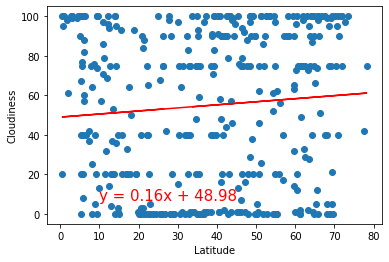

In [135]:
# Northern Hemisphire Lat vs Cloudiness
x_values = n_hem['Lat']
y_values = n_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('NH_lat_vs_Cloud_Linreg.png')
plt.show()

#### There's no correlation between Claudiness and Northern Hemisphire City Latitude

### Southern Hemisphire: Cloudiness (%) vs Linear Regression

The r-squared is: 0.03155388500234171


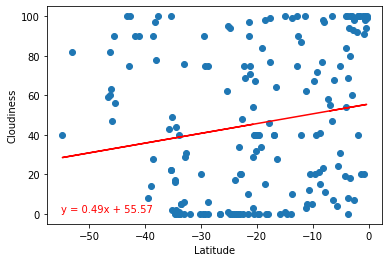

In [144]:
# Southern Hemisphire Lat vs Cloudiness
x_values = s_hem['Lat']
y_values = s_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,1),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('SH_lat_vs_Cloud_Linreg.png')
plt.show()

#### There´s no correlation between Cloudiness and Southern Hemisphire City Latitude

### Northern Hemisphire: Wind Speed (mph) vs Latitude Linear Regression

The r-squared is: 0.0031554578511021228


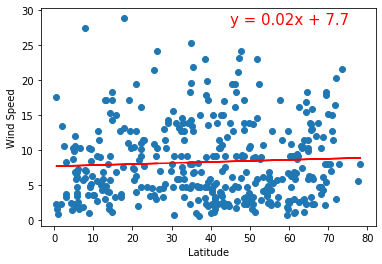

In [147]:
# Northern Hemisphire Lat vs Wind Speed
x_values = n_hem['Lat']
y_values = n_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,28),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('NH_lat_vs_WS_Linreg.png')
plt.show()

#### There's no correlation between Wind Speed and Northern Hemisphire City Latitude

### Southern Hemisphire: Wind Speed (mph) vs Latitude Linear Regression

The r-squared is: 0.0017690385151827959


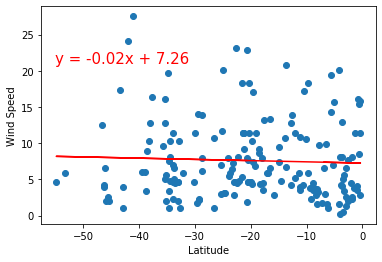

In [152]:
# Southern Hemisphire Lat vs Wind Speed
x_values = s_hem['Lat']
y_values = s_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,21),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('SH_lat_vs_WS_Linreg.png')
plt.show()

#### There´s no correlation between Wind Speed and Southern Hemisphire City Latitude